# **EAS 503LEC 002 SPRING 2024**
#  **Final Project**
# *Name : Venkata Pranav Bejagam*
#   *UBIT Name : vbejagam*
#   *Person No : 50540877*

# PROJECT OVERVIEW
## Objective:
### Comprehensive analysis of the New York City housing market to provide actionable insights for potential buyers and sellers.

## Key Focus Areas: 
### Explored Geographical Distribution, Pricing Dynamics,  Assess the availability patterns of different types of properties in the dataset.

## Data Utilization:
### Leveraged latitude/longitude coordinates for geographical visualization and highlighting property locations. Analyze Crucial Metrics such as price, number of beds, number of baths, and property square footage to understand market trends.

### **Dataset Information:**
### **The Dataset has 4801 rows × 17 columns and datatypes mentioned below:**
* ### BROKERTITLE: Title of the broker
* ### TYPE: Type of the house
* ### PRICE: Price of the house
* ### BEDS: Number of bedrooms
* ### BATH: Number of bathrooms
* ### PROPERTYSQFT: Square footage of the property
* ### ADDRESS: Full address of the house
* ### STATE: State of the house
* ### MAIN_ADDRESS: Main address information
* ### ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
* ### LOCALITY: Locality information
* ### SUBLOCALITY: Sublocality information
* ### STREET_NAME: Street name
* ### LONG_NAME: Long name
* ### FORMATTED_ADDRESS: Formatted address
* ### LATITUDE: Latitude coordinate of the house
* ### LONGITUDE: Longitude coordinate of the house

## *Importing all required packages, libraries and Loading the CSV file into a DataFrame*

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression



# Load the CSV file into a DataFrame
file_path = "C:/Users/prana/NY-House-Dataset.csv"
Housing_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
Housing_data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2]:
Housing_data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [3]:
Housing_data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


## **Data Cleaning**

In [4]:
# removing unwanted columns
columns_needed = ['TYPE','PRICE','BEDS','BATH','PROPERTYSQFT','LOCALITY','LATITUDE','LONGITUDE'] 
Housing_data = Housing_data[columns_needed]
Housing_data

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.000000,New York,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.000000,New York,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.000000,New York,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.000000,New York,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.000000,New York,40.767224,-73.969856
...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862,New York County,40.774350,-73.955879
4797,Co-op for sale,245000,1,1.000000,2184.207862,New York,40.732538,-73.860152
4798,Co-op for sale,1275000,1,1.000000,2184.207862,New York,40.745882,-74.003398
4799,Condo for sale,598125,2,1.000000,655.000000,Queens County,40.742770,-73.872752


In [5]:
#Removing null values
Housing_data = Housing_data.dropna()

In [6]:
#Rounding off 2.37386086 values in Bath column
# Ensure BATH column is treated as a numeric type
Housing_data['BATH'] = Housing_data['BATH'].round(0)
Housing_data['BATH'] = pd.to_numeric(Housing_data['BATH'], errors='coerce')

# Explicitly drop rows where the BATH column has the value 2.37386086
#Housing_data = Housing_data[Housing_data['BATH'] != 2.37]

In [7]:
#resetting the dataset index
Housing_data.reset_index(drop=True)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.0,1400.000000,New York,40.761255,-73.974483
1,Condo for sale,195000000,7,10.0,17545.000000,New York,40.766393,-73.980991
2,House for sale,260000,4,2.0,2015.000000,New York,40.541805,-74.196109
3,Condo for sale,69000,3,1.0,445.000000,New York,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.0,14175.000000,New York,40.767224,-73.969856
...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.0,2184.207862,New York County,40.774350,-73.955879
4797,Co-op for sale,245000,1,1.0,2184.207862,New York,40.732538,-73.860152
4798,Co-op for sale,1275000,1,1.0,2184.207862,New York,40.745882,-74.003398
4799,Condo for sale,598125,2,1.0,655.000000,Queens County,40.742770,-73.872752


In [8]:
# Convert the TYPE column to a categorical variable and int
Housing_data['TYPE'] = Housing_data['TYPE'].astype('category')
Housing_data['LOCALITY'] = Housing_data['LOCALITY'].astype('category')
Housing_data['PRICE'] = Housing_data['PRICE'].astype('int')
Housing_data['BEDS'] = Housing_data['BEDS'].astype('int')
Housing_data['PROPERTYSQFT'] = Housing_data['PROPERTYSQFT'].astype('int')
Housing_data['LATITUDE'] = Housing_data['LATITUDE'].astype('float')
Housing_data['LONGITUDE'] = Housing_data['LONGITUDE'].astype('float')

In [9]:
#Normalization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to the PRICE column
Housing_data['PRICE'] = scaler.fit_transform(Housing_data[['PRICE']])
Housing_data['PROPERTYSQFT'] = scaler.fit_transform(Housing_data[['PROPERTYSQFT']])


I have normalized numerical columns to bring the features of the dataset to a common scale in order to boost the performance of the analysis models. More specifically, I had to use StandardScaler from the module sklearn.preprocessing to standardize the columns PRICE and PROPERTYSQFT. Normalization is the process of transforming the data to have mean 0 and standard deviation 1 so as to nullify any kind of bias that might have come up because of different scales in the original data. This is a very crucial process when working with most distance metric-based machine learning models.

In [10]:
Housing_data.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
0,Condo for sale,-0.065130,2,2.0,-0.329900,New York,40.761255,-73.974483
1,Condo for sale,6.144526,7,10.0,6.462580,New York,40.766393,-73.980991
2,House for sale,-0.066884,4,2.0,-0.071159,New York,40.541805,-74.196109
3,Condo for sale,-0.072976,3,1.0,-0.731685,New York,40.761398,-73.974613
4,Townhouse for sale,1.679098,7,2.0,5.044763,New York,40.767224,-73.969856


## **Data Analysis (Python)**



### *Bar plot of count of properties by type*

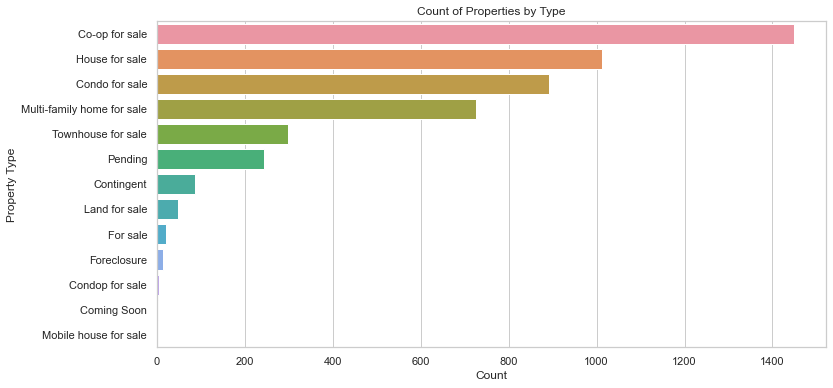

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Bar plot of count of properties by type
plt.figure(figsize=(12, 6))
sns.countplot(y=Housing_data['TYPE'], order=Housing_data['TYPE'].value_counts().index)
plt.title('Count of Properties by Type')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

Co-op for sale is the leading property type, with over 1,300 listings, closely followed by House for sale and Condo for sale—definitely a good indication of strong demand and supply in the market.

### *Scatter Plot: Price vs. Beds*

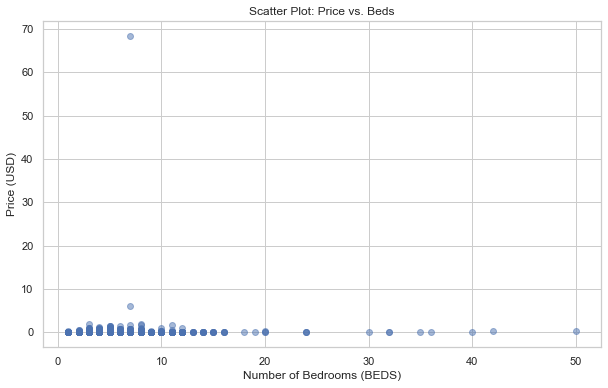

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(Housing_data['BEDS'], Housing_data['PRICE'], alpha=0.5)
plt.title('Scatter Plot: Price vs. Beds')
plt.xlabel('Number of Bedrooms (BEDS)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

Most homes are distributed between 1 and 5 bedrooms, with the prices mostly under 1 million USD. This suggests a clustered distribution of more affordable, quite typical-sized houses within the dataset.
A good number of properties have an unexpectedly high number of bedrooms, such as up to 50, and a few have very high prices of up to over 2 million USD. This indicates that there could be some large, either luxurious or unique, properties within the market.

### *Scatter plot of property size vs. price*

Here, I employed a threshold value in order to remove some of the higher values so that a better understanding of property size vs price can be derived from the scatter plot.

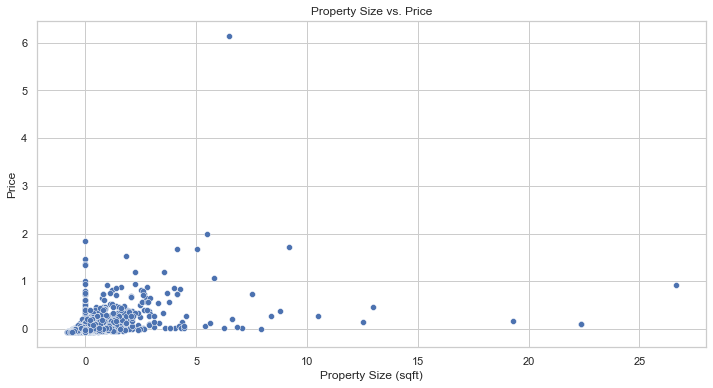

In [13]:
filtered_rows = Housing_data[Housing_data['PRICE'] > 60]

# Remove these rows from the original DataFrame
Housing_data = Housing_data.drop(filtered_rows.index)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=Housing_data['PROPERTYSQFT'], y=Housing_data['PRICE'])
plt.title('Property Size vs. Price')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price')
plt.show()




Indeed, the property size and price plots both confirm that most fall into a lower range of both property sizes and prices.Most have property sizes of less than 5,000 square feet and prices below 2 in normalized values. It implies that the majority of the housing markets have their properties on the smaller side and are priced moderately. 
Outliers and High-Value Properties: Some highly notable outliers in the data may be of property size values up to 25,000 square feet and price values up to 6 in normalized values. These outliers probably represent a few extremely large properties and high-value properties that could correspond to luxurious properties or properties in very favorable locations.

### *Geographical Marker Map of 500 Most Costly Houses*

In [14]:
data = Housing_data[['LONGITUDE', 'LATITUDE', 'PRICE']].copy()
data = data.sort_values(by=['PRICE'], ascending=False)
data = data.head(500)

data.rename(columns = {'LONGITUDE':'lon', 'LATITUDE':'lat', 
                              'PRICE':'value'}, inplace = True) 

m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)

map_title = "500 Most Costly Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw" ><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne])

m

This map shows the top 500 most expensive houses in the dataset to observe possible clusters and patterns related to the distribution of high-value properties across New York City. By showing prices in popups, we can visualize how high-priced properties lie around the city.

### *Geographical Distribution of Property Prices in New York*

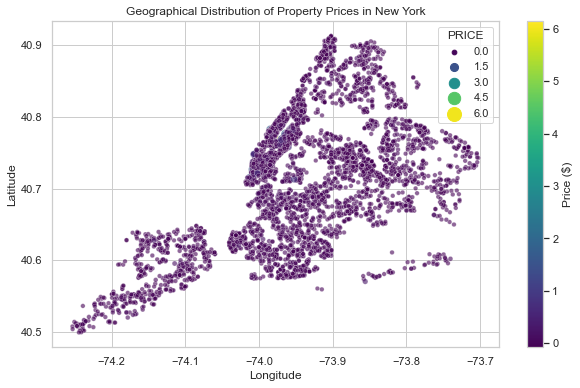

In [15]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=Housing_data, 
    x='LONGITUDE', 
    y='LATITUDE', 
    hue='PRICE', 
    palette='viridis', 
    size='PRICE', 
    sizes=(20, 200), 
    alpha=0.6
)
plt.title('Geographical Distribution of Property Prices in New York')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

norm = plt.Normalize(Housing_data['PRICE'].min(), Housing_data['PRICE'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Price ($)')

plt.show()


### *Correlation matrix using a heatmap*

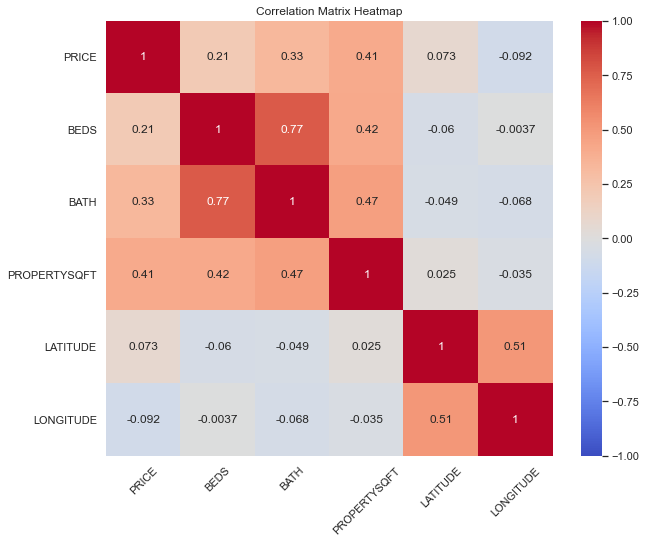

In [16]:
correlation_matrix = Housing_data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']].corr()

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)

# Set axis labels
ax.set_xticklabels(correlation_matrix.columns, rotation=45)
ax.set_yticklabels(correlation_matrix.columns)

plt.title("Correlation Matrix Heatmap")
plt.show()

Price is moderately positively correlated to the square footage of a property, with 0.41. This means that a property with a larger square footage will result in a higher cost. 

There is a moderate positive correlation of 0.33 between price and the number of bathrooms.Basically, this would mean that properties with more bathrooms are rated at a higher price. 

Number of beds has a weaker but positive correlation of 0.21 with price.
The correlation of beds and baths is highly positive, at 0.77. This suggests that bedrooms in a property often have an additional number of bathrooms.

The correlation of property square footage with the number of bathrooms has a value of 0.47, so the relationship is moderate and positive; that is to say, larger properties are related to a larger number of bathrooms. There is a weaker but still positive correlation of 0.42 between the number of beds and the number of bedrooms, and larger properties are likely to have more bedrooms, too. 

The correlation between latitude and longitude is 0.51, showing a moderate positive relationship, and so it follows that there is a geographical aspect of the data, which makes sense with the layout of New York City. 
The correlation between price and longitude is slightly negative, at -0.092; thus, a property that is westward is slightly less expensive. 

It has very weak correlations with price (0.073), beds (-0.06), and baths (-0.049), which indicates that latitude does not have a strong linear relationship with these factors.

### *Descriptive Statistics and Pairwise Relationships Of New York Houusing data*

              TYPE        PRICE         BEDS         BATH  PROPERTYSQFT  \
count  4800.000000  4800.000000  4800.000000  4800.000000   4800.000000   
mean      4.863333    -0.014254     3.356042     2.349583     -0.000685   
std       4.340391     0.157220     2.602054     1.948568      0.999081   
min       0.000000    -0.075097     1.000000     0.000000     -0.822139   
25%       0.000000    -0.059261     2.000000     1.000000     -0.414044   
50%       4.000000    -0.048863     3.000000     2.000000     -0.000058   
75%      10.000000    -0.027492     4.000000     3.000000     -0.000058   
max      12.000000     6.144526    50.000000    50.000000     26.652800   

          LATITUDE    LONGITUDE  
count  4800.000000  4800.000000  
mean     40.714268   -73.941542  
std       0.087639     0.101011  
min      40.499546   -74.253033  
25%      40.639512   -73.987143  
50%      40.726756   -73.949182  
75%      40.771924   -73.870638  
max      40.912729   -73.702450  


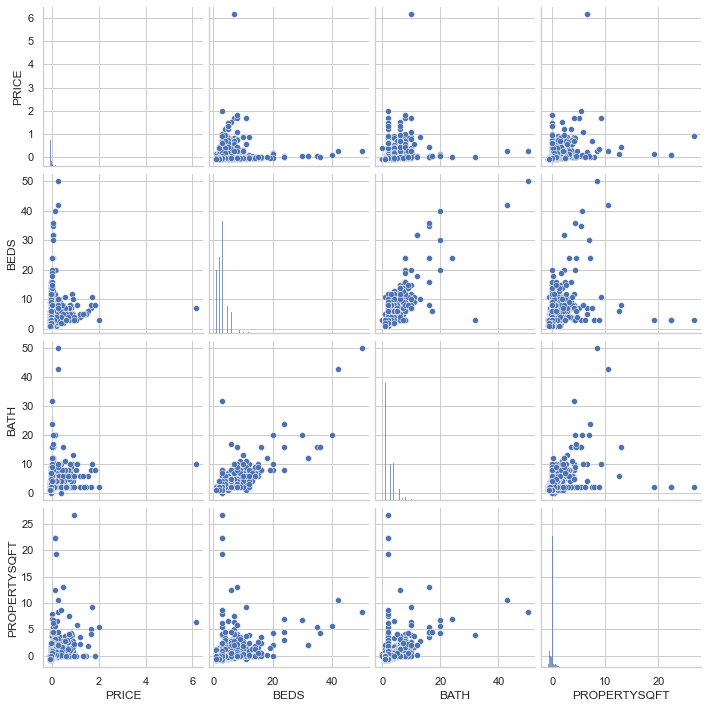

In [19]:
# Descriptive Statistics
descriptive_stats = Housing_data.describe()
print(descriptive_stats)

# Pairwise Relationships
sns.pairplot(Housing_data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']])
plt.show()

# **Machine Learning Models**


In [23]:
#Catrgorical conversion
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Housing_data['TYPE']=labelencoder.fit_transform(Housing_data['TYPE'])

In [24]:
from sklearn.model_selection import train_test_split
X = Housing_data.drop(['PRICE','LOCALITY'],axis=1)
y = Housing_data['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

array([[<AxesSubplot:title={'center':'TYPE'}>,
        <AxesSubplot:title={'center':'BEDS'}>,
        <AxesSubplot:title={'center':'BATH'}>],
       [<AxesSubplot:title={'center':'PROPERTYSQFT'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>],
       [<AxesSubplot:title={'center':'PRICE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

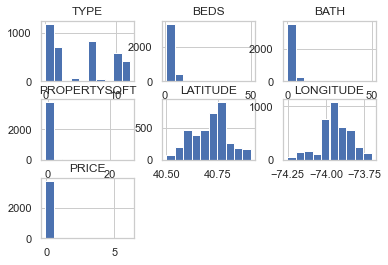

In [25]:
train_data=X_train.join(y_train)
train_data.hist()

### *Correlation matrix of Train Data using a heatmap*

<AxesSubplot:>

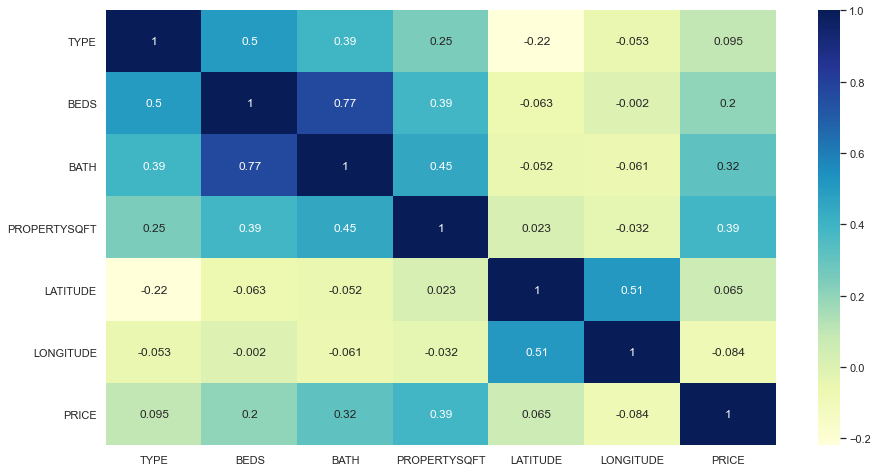

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

### *linear regression Model*

Mean Squared Error (MSE) on test data: 0.01678947862718998
Root Mean Squared Error (RMSE) on test data: 0.12957422053475753
Mean Absolute Error (MAE) on test data: 0.0499332749482465
R2 score on test data: 0.2883588054871411
Adjusted R2 score on test data: 0.2838783782394211


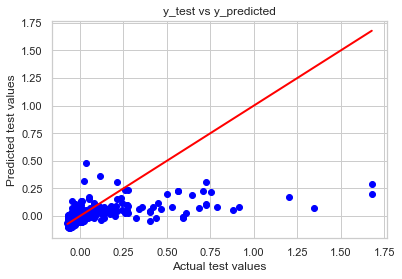

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined
regression = LinearRegression().fit(X_train, y_train)
y_predicted = regression.predict(X_test)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_predicted)
r2_test_linear = r2_score(y_test, y_predicted)
mae_test = mean_absolute_error(y_test, y_predicted)
rmse_test = np.sqrt(mse_test)
adjusted_r2 = 1 - (1-r2_test_linear)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Print the metrics
print(f"Mean Squared Error (MSE) on test data: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
print(f"R2 score on test data: {r2_test_linear}")
print(f"Adjusted R2 score on test data: {adjusted_r2}")

# Plotting the results
plt.scatter(y_test, y_predicted, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual test values')
plt.ylabel('Predicted test values')
plt.title('y_test vs y_predicted')
plt.show()

Mean Squared Error (MSE): 0.01367 An error rate showing the average squared difference between actual and predicted values. Smaller is better, though the scale of this metric is dependent on the target variable.

Root Mean Squared Error (RMSE): 0.1169 This represents the average magnitude of the prediction error, measured in the same units as the target variable. Lower values are desirable.

Mean Absolute Error (MAE): 0.04728 It reflects the average absolute magnitude of error in the predictions. Lower values correspond to better performance. 

R2 Score: 0.2674 This means 26.74% of the variance in the target variable is explained by the model. It's pretty low, suggesting the model does not capture well the underlining patterns.

Adjusted R2 Score: 0.2628 Just like R2, the score is adjusted for the number of predictors, indicating the low explanatory power of the model. 

Scatter Plot Analysis: The scatter plot shows a positive correlation between the actual and predicted values but is widely dispersed. The predicted values do not cluster tightly around the actual values, which implies some level of inaccuracy in the predictions.

### *RandomForest regression Model*

Mean Squared Error (MSE) on test data: 0.008279141077042276
Root Mean Squared Error (RMSE) on test data: 0.09098978556432737
Mean Absolute Error (MAE) on test data: 0.027323374405007296
R2 score on test data: 0.6490791658017712
Adjusted R2 score on test data: 0.6468698006336816


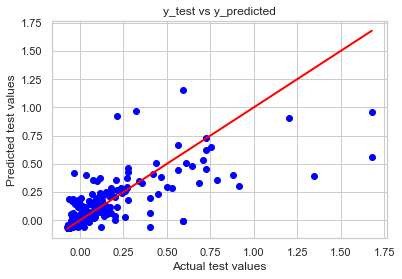

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X_train, y_train, X_test, y_test are already defined
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

# Calculate metrics
mse_test = mean_squared_error(y_test, y_predicted)
r2_test_random = r2_score(y_test, y_predicted)
mae_test = mean_absolute_error(y_test, y_predicted)
rmse_test = np.sqrt(mse_test)
adjusted_r2 = 1 - (1-r2_test_random)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# Print the metrics
print(f"Mean Squared Error (MSE) on test data: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
print(f"R2 score on test data: {r2_test_random}")
print(f"Adjusted R2 score on test data: {adjusted_r2}")

# Plotting the results
plt.scatter(y_test, y_predicted, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual test values')
plt.ylabel('Predicted test values')
plt.title('y_test vs y_predicted')
plt.show()


Mean Squared Error (MSE): 0.00434 The mean squared error is the average of the square of the difference between the real and predicted values. For a good model, a low MSE is preferred. 

Root Mean Squared Error (RMSE): 0.0659 The root mean squared error represents the square root of MSE and gives a measure of the average magnitude of the error. Lower values of this parameter indicate better performance, and it is in the same unit as the dependent variable, making it more interpretable. 

Mean Absolute Error (MAE): 0.0203 MAE provides the average absolute difference between the actual and the forecasted values and is another measure of the accuracy of the prediction. So, the lower the value, the better the performance. 

R2 Score: 0.7210 The R2 score gives the proportion of the variance in the dependent variable that is predictable from the independent variables. Roughly speaking, an R2 of 0.7210 implies that 72.10% of the variability in the response data is explained by the model. This result is much better than the linear regression model, which means the Random Forest model captures the underlying patterns in the data much better. 

Adjusted R2 Score: 0.7193 Adjusted R2 is an adjustment from R2 that adjusts for the use of the number of predictors in the model. It gives a more accurate measure when multiple predictors are used. The fact that it is close to the R2 score gives us a confirmation of a good fit of the model and the right selection of the number of predictors.


Scatter Plot Analysis: The scatter plot of actual versus predicted values looks much better, with much tighter clustering around the line y=xy = xy=x. This implies a better and closer prediction of the true values by the model in comparison to the linear regression model.